# 01. Import Libraries

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically

%matplotlib inline

# 02. Import Data

In [3]:
# Path Creation
path = r'/Users/tyrasmussen/Desktop/08-2023 UFC Analysis'

In [4]:
# Import Main Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_merged_weight.pkl'))

# 03. Data Cleaning

In [5]:
df.columns

Index(['R_fighter', 'B_fighter', 'Referee_x', 'date_x', 'location', 'Winner_x',
       'title_bout', 'weight_class', 'B_avg_KD', 'B_avg_opp_KD',
       ...
       'Format', 'Referee_y', 'date_y', 'Year', 'City', 'State', 'Country',
       'Fight_type', 'Winner_y', 'Weight category'],
      dtype='object', length=187)

In [7]:
# Display all results
pd.set_option('display.max_columns', None)

In [9]:
df.head()

R_fighter      B_fighter       Referee_x      date_x  \
0     Adrian Yanez  Gustavo Lopez   Chris Tognoni  2021-03-20   
1     Trevin Giles  Roman Dolidze       Herb Dean  2021-03-20   
2    Marion Reneau  Macy Chiasson      Mark Smith  2021-03-20   
3  Leonardo Santos   Grant Dawson   Chris Tognoni  2021-03-20   
4       Song Kenan    Max Griffin  Keith Peterson  2021-03-20   

                 location Winner_x  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA      Red       False       Bantamweight  0.000000   
1  Las Vegas, Nevada, USA      Red       False       Middleweight  0.500000   
2  Las Vegas, Nevada, USA     Blue       False  WomenBantamweight  0.125000   
3  Las Vegas, Nevada, USA     Blue       False        Lightweight  0.000000   
4  Las Vegas, Nevada, USA     Blue       False       Welterweight  0.046875   

   B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  \
0         0.000           0.420000               0.495000      0.330000   
1         0.000           0.660000               0.305000      0.300000   
2         0.000           0.535625               0.578750      0.185000   
3         0.000           0.515000               0.473750      0.435000   
4         0.125           0.459277               0.404687      0.322188   

   B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  B_avg_REV  \
0          0.360000       0.500000             1.0000   0.000000   
1          0.500000       1.500000             0.0000   0.000000   
2          0.166250       0.125000             0.1875   0.250000   
3          0.250000       1.250000             0.6250   0.000000   
4          0.068867       0.189453             0.0000   0.283203   

   B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
0           0.00          50.000000             20.000000   
1           0.00          65.500000             35.000000   
2           0.00         109.187500             57.937500   
3           0.25          86.000000             40.750000   
4           0.00         130.818359             60.113281   

   B_avg_opp_SIG_STR_att  B_avg_opp_SIG_STR_landed  B_avg_TOTAL_STR_att  \
0              84.000000                 45.000000            76.500000   
1              50.000000                 16.500000           113.500000   
2              50.625000                 28.437500           170.437500   
3              55.500000                 25.125000           150.625000   
4             129.337891                 50.548828           151.554688   

   B_avg_TOTAL_STR_landed  B_avg_opp_TOTAL_STR_att  \
0               41.000000               114.000000   
1               68.500000                68.500000   
2              105.625000                74.375000   
3               93.500000                79.000000   
4               78.324219               137.427734   

   B_avg_opp_TOTAL_STR_landed  B_avg_TD_att  B_avg_TD_landed  \
0                   64.000000      1.500000         1.000000   
1                   29.000000      2.500000         1.500000   
2                   44.250000      5.375000         1.500000   
3                   46.750000      6.375000         2.625000   
4                   58.507812      2.730469         1.453125   

   B_avg_opp_TD_att  B_avg_opp_TD_landed  B_avg_HEAD_att  B_avg_HEAD_landed  \
0          9.000000             6.500000       39.500000          11.000000   
1          0.500000             0.500000       46.000000          20.000000   
2          2.000000             0.625000       77.375000          31.375000   
3          0.250000             0.250000       60.625000          23.125000   
4          1.552734             0.285156      102.328125          38.814453   

   B_avg_opp_HEAD_att  B_avg_opp_HEAD_landed  B_avg_BODY_att  \
0           63.000000              27.500000        7.500000   
1           36.000000               7.500000       12.000000   
2           41.562500              22.625000       31.187500   
3           42.375000   

In [10]:
df.shape

(3645, 187)

### Columns

In [15]:
# Rename columns
df.rename(columns = {'Referee_x' : 'Referee', 'date' : 'Date', 'Winner_x' : 'Winner'}, inplace = True)

In [17]:
df.head()

R_fighter      B_fighter         Referee        Date  \
0     Adrian Yanez  Gustavo Lopez   Chris Tognoni  2021-03-20   
1     Trevin Giles  Roman Dolidze       Herb Dean  2021-03-20   
2    Marion Reneau  Macy Chiasson      Mark Smith  2021-03-20   
3  Leonardo Santos   Grant Dawson   Chris Tognoni  2021-03-20   
4       Song Kenan    Max Griffin  Keith Peterson  2021-03-20   

                 location Winner  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA    Red       False       Bantamweight  0.000000   
1  Las Vegas, Nevada, USA    Red       False       Middleweight  0.500000   
2  Las Vegas, Nevada, USA   Blue       False  WomenBantamweight  0.125000   
3  Las Vegas, Nevada, USA   Blue       False        Lightweight  0.000000   
4  Las Vegas, Nevada, USA   Blue       False       Welterweight  0.046875   

   B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  \
0         0.000           0.420000               0.495000      0.330000   
1         0.000           0.660000               0.305000      0.300000   
2         0.000           0.535625               0.578750      0.185000   
3         0.000           0.515000               0.473750      0.435000   
4         0.125           0.459277               0.404687      0.322188   

   B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  B_avg_REV  \
0          0.360000       0.500000             1.0000   0.000000   
1          0.500000       1.500000             0.0000   0.000000   
2          0.166250       0.125000             0.1875   0.250000   
3          0.250000       1.250000             0.6250   0.000000   
4          0.068867       0.189453             0.0000   0.283203   

   B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
0           0.00          50.000000             20.000000   
1           0.00          65.500000             35.000000   
2           0.00         109.187500             57.937500   
3           0.25          86.000000             40.750000   
4           0.00         130.818359             60.113281   

   B_avg_opp_SIG_STR_att  B_avg_opp_SIG_STR_landed  B_avg_TOTAL_STR_att  \
0              84.000000                 45.000000            76.500000   
1              50.000000                 16.500000           113.500000   
2              50.625000                 28.437500           170.437500   
3              55.500000                 25.125000           150.625000   
4             129.337891                 50.548828           151.554688   

   B_avg_TOTAL_STR_landed  B_avg_opp_TOTAL_STR_att  \
0               41.000000               114.000000   
1               68.500000                68.500000   
2              105.625000                74.375000   
3               93.500000                79.000000   
4               78.324219               137.427734   

   B_avg_opp_TOTAL_STR_landed  B_avg_TD_att  B_avg_TD_landed  \
0                   64.000000      1.500000         1.000000   
1                   29.000000      2.500000         1.500000   
2                   44.250000      5.375000         1.500000   
3                   46.750000      6.375000         2.625000   
4                   58.507812      2.730469         1.453125   

   B_avg_opp_TD_att  B_avg_opp_TD_landed  B_avg_HEAD_att  B_avg_HEAD_landed  \
0          9.000000             6.500000       39.500000          11.000000   
1          0.500000             0.500000       46.000000          20.000000   
2          2.000000             0.625000       77.375000          31.375000   
3          0.250000             0.250000       60.625000          23.125000   
4          1.552734             0.285156      102.328125          38.814453   

   B_avg_opp_HEAD_att  B_avg_opp_HEAD_landed  B_avg_BODY_att  \
0           63.000000              27.500000        7.500000   
1           36.000000               7.500000       12.000000   
2           41.562500              22.625000       31.187500   
3           42.375000              1

In [20]:
# Drop duplicate columns
df = df.drop(columns = ['Referee_y'])

In [21]:
df = df.drop(columns = ['date_y'])

In [22]:
df = df.drop(columns = ['Winner_y'])

In [23]:
df.head()

R_fighter      B_fighter         Referee        Date  \
0     Adrian Yanez  Gustavo Lopez   Chris Tognoni  2021-03-20   
1     Trevin Giles  Roman Dolidze       Herb Dean  2021-03-20   
2    Marion Reneau  Macy Chiasson      Mark Smith  2021-03-20   
3  Leonardo Santos   Grant Dawson   Chris Tognoni  2021-03-20   
4       Song Kenan    Max Griffin  Keith Peterson  2021-03-20   

                 location Winner  title_bout       weight_class  B_avg_KD  \
0  Las Vegas, Nevada, USA    Red       False       Bantamweight  0.000000   
1  Las Vegas, Nevada, USA    Red       False       Middleweight  0.500000   
2  Las Vegas, Nevada, USA   Blue       False  WomenBantamweight  0.125000   
3  Las Vegas, Nevada, USA   Blue       False        Lightweight  0.000000   
4  Las Vegas, Nevada, USA   Blue       False       Welterweight  0.046875   

   B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  \
0         0.000           0.420000               0.495000      0.330000   
1         0.000           0.660000               0.305000      0.300000   
2         0.000           0.535625               0.578750      0.185000   
3         0.000           0.515000               0.473750      0.435000   
4         0.125           0.459277               0.404687      0.322188   

   B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  B_avg_REV  \
0          0.360000       0.500000             1.0000   0.000000   
1          0.500000       1.500000             0.0000   0.000000   
2          0.166250       0.125000             0.1875   0.250000   
3          0.250000       1.250000             0.6250   0.000000   
4          0.068867       0.189453             0.0000   0.283203   

   B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
0           0.00          50.000000             20.000000   
1           0.00          65.500000             35.000000   
2           0.00         109.187500             57.937500   
3           0.25          86.000000             40.750000   
4           0.00         130.818359             60.113281   

   B_avg_opp_SIG_STR_att  B_avg_opp_SIG_STR_landed  B_avg_TOTAL_STR_att  \
0              84.000000                 45.000000            76.500000   
1              50.000000                 16.500000           113.500000   
2              50.625000                 28.437500           170.437500   
3              55.500000                 25.125000           150.625000   
4             129.337891                 50.548828           151.554688   

   B_avg_TOTAL_STR_landed  B_avg_opp_TOTAL_STR_att  \
0               41.000000               114.000000   
1               68.500000                68.500000   
2              105.625000                74.375000   
3               93.500000                79.000000   
4               78.324219               137.427734   

   B_avg_opp_TOTAL_STR_landed  B_avg_TD_att  B_avg_TD_landed  \
0                   64.000000      1.500000         1.000000   
1                   29.000000      2.500000         1.500000   
2                   44.250000      5.375000         1.500000   
3                   46.750000      6.375000         2.625000   
4                   58.507812      2.730469         1.453125   

   B_avg_opp_TD_att  B_avg_opp_TD_landed  B_avg_HEAD_att  B_avg_HEAD_landed  \
0          9.000000             6.500000       39.500000          11.000000   
1          0.500000             0.500000       46.000000          20.000000   
2          2.000000             0.625000       77.375000          31.375000   
3          0.250000             0.250000       60.625000          23.125000   
4          1.552734             0.285156      102.328125          38.814453   

   B_avg_opp_HEAD_att  B_avg_opp_HEAD_landed  B_avg_BODY_att  \
0           63.000000              27.500000        7.500000   
1           36.000000               7.500000       12.000000   
2           41.562500              22.625000       31.187500   
3           42.375000              1

### Missing Values

In [25]:
# Check for missing values
df.isnull().sum()
# No missing values

R_fighter          0
B_fighter          0
Referee            0
Date               0
location           0
                  ..
City               0
State              0
Country            0
Fight_type         0
Weight category    0
Length: 184, dtype: int64

### Duplicates

In [26]:
dups = df.duplicated()

In [28]:
dups.shape
# No duplicates

(3645,)

### Extreme Values Check

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/3767789986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R_Weight_lbs'], bins = 25)


<Axes: xlabel='R_Weight_lbs', ylabel='Density'>

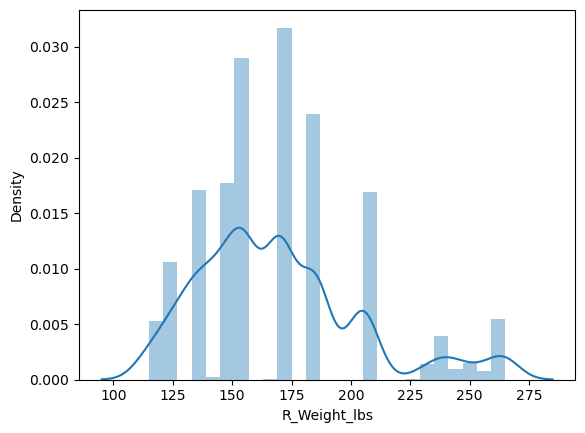

In [34]:
sns.distplot(df['R_Weight_lbs'], bins = 25)

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/3880645812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R_total_time_fought(seconds)'], bins = 25)


<Axes: xlabel='R_total_time_fought(seconds)', ylabel='Density'>

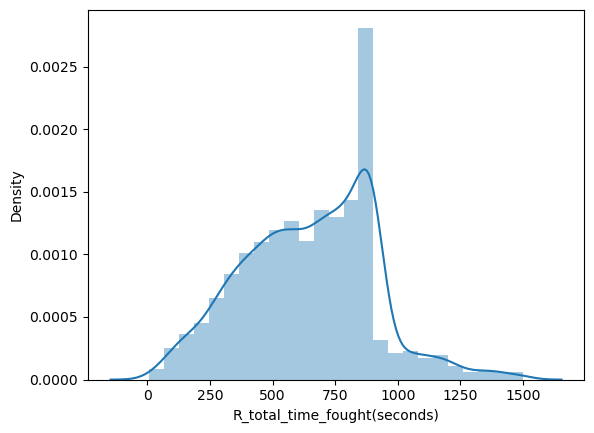

In [42]:
sns.distplot(df['R_total_time_fought(seconds)'], bins = 25)

In [64]:
df['R_Weight_lbs'].describe()

count    3645.000000
mean      168.945953
std        34.169367
min       115.000000
25%       145.000000
50%       170.000000
75%       185.000000
max       265.000000
Name: R_Weight_lbs, dtype: float64

In [65]:
df['R_total_time_fought(seconds)'].describe()

count    3645.000000
mean      648.170059
std       264.342772
min         7.000000
25%       456.000000
50%       665.549772
75%       848.578125
max      1500.000000
Name: R_total_time_fought(seconds), dtype: float64

## Remove Outliers Process

### R_Weight_lbs

### Q1 = 145.00000
### Q3 = 185.00000
### IQR = 185 - 145 = 40

### Lower Limit: Q1 - (1.5 * IQR) = 145 - (1.5 * 40) = 85

### Upper Limit: Q3 + (1.5 * IQR) = 185 + (1.5 * 40) = 245

In [66]:
# Remove Outliers
df[df['R_Weight_lbs'] < 85]

Empty DataFrame
Columns: [R_fighter, B_fighter, Referee, Date, location, Winner, title_bout, weight_class, B_avg_KD, B_avg_opp_KD, B_avg_SIG_STR_pct, B_avg_opp_SIG_STR_pct, B_avg_TD_pct, B_avg_opp_TD_pct, B_avg_SUB_ATT, B_avg_opp_SUB_ATT, B_avg_REV, B_avg_opp_REV, B_avg_SIG_STR_att, B_avg_SIG_STR_landed, B_avg_opp_SIG_STR_att, B_avg_opp_SIG_STR_landed, B_avg_TOTAL_STR_att, B_avg_TOTAL_STR_landed, B_avg_opp_TOTAL_STR_att, B_avg_opp_TOTAL_STR_landed, B_avg_TD_att, B_avg_TD_landed, B_avg_opp_TD_att, B_avg_opp_TD_landed, B_avg_HEAD_att, B_avg_HEAD_landed, B_avg_opp_HEAD_att, B_avg_opp_HEAD_landed, B_avg_BODY_att, B_avg_BODY_landed, B_avg_opp_BODY_att, B_avg_opp_BODY_landed, B_avg_LEG_att, B_avg_LEG_landed, B_avg_opp_LEG_att, B_avg_opp_LEG_landed, B_avg_DISTANCE_att, B_avg_DISTANCE_landed, B_avg_opp_DISTANCE_att, B_avg_opp_DISTANCE_landed, B_avg_CLINCH_att, B_avg_CLINCH_landed, B_avg_opp_CLINCH_att, B_avg_opp_CLINCH_landed, B_avg_GROUND_att, B_avg_GROUND_landed, B_avg_opp_GROUND_att, B_avg_opp_GROUND_landed, B_avg_CTRL_time(seconds), B_avg_opp_CTRL_time(seconds), B_total_time_fought(seconds), B_total_rounds_fought, B_total_title_bouts, B_current_win_streak, B_current_lose_streak, B_longest_win_streak, B_wins, B_losses, B_draw, B_win_by_Decision_Majority, B_win_by_Decision_Split, B_win_by_Decision_Unanimous, B_win_by_KO/TKO, B_win_by_Submission, B_win_by_TKO_Doctor_Stoppage, B_Stance, B_Height_cms, B_Reach_cms, B_Weight_lbs, R_avg_KD, R_avg_opp_KD, R_avg_SIG_STR_pct, R_avg_opp_SIG_STR_pct, R_avg_TD_pct, R_avg_opp_TD_pct, R_avg_SUB_ATT, R_avg_opp_SUB_ATT, R_avg_REV, R_avg_opp_REV, R_avg_SIG_STR_att, R_avg_SIG_STR_landed, R_avg_opp_SIG_STR_att, R_avg_opp_SIG_STR_landed, R_avg_TOTAL_STR_att, R_avg_TOTAL_STR_landed, R_avg_opp_TOTAL_STR_att, R_avg_opp_TOTAL_STR_landed, R_avg_TD_att, R_avg_TD_landed, R_avg_opp_TD_att, R_avg_opp_TD_landed, R_avg_HEAD_att, R_avg_HEAD_landed, R_avg_opp_HEAD_att, ...]
Index: []

In [68]:
df = df[df['R_Weight_lbs'] > 85]

In [69]:
df[df['R_Weight_lbs'] > 245]

R_fighter               B_fighter          Referee        Date  \
42      Curtis Blaydes           Derrick Lewis        Herb Dean  2021-02-20   
60    Alistair Overeem        Alexander Volkov     Jason Herzog  2021-02-06   
106      Marcin Tybura              Greg Hardy  Dan Miragliotta  2020-12-19   
149     Don'Tale Mayes          Roque Martinez    Chris Tognoni  2020-11-14   
152   Alexandr Romanov  Marcos Rogerio de Lima        Herb Dean  2020-11-07   
...                ...                     ...              ...         ...   
3540        Tim Sylvia         Andrei Arlovski    John McCarthy  2006-07-08   
3541        Tim Sylvia         Andrei Arlovski        Herb Dean  2006-04-15   
3542        Tim Sylvia         Andrei Arlovski        Herb Dean  2006-04-15   
3614         Frank Mir              Tim Sylvia        Herb Dean  2004-06-19   
3638      Josh Barnett           Randy Couture    John McCarthy  2002-03-22   

                      location Winner  title_bout weight_class  B_avg_KD  \
42      Las Vegas, Nevada, USA   Blue       False  Heavyweight  0.524536   
60      Las Vegas, Nevada, USA   Blue       False  Heavyweight  0.046875   
106     Las Vegas, Nevada, USA    Red       False  Heavyweight  0.500000   
149     Las Vegas, Nevada, USA    Red       False  Heavyweight  0.000000   
152     Las Vegas, Nevada, USA    Red       False  Heavyweight  0.761719   
...                        ...    ...         ...          ...       ...   
3540    Las Vegas, Nevada, USA    Red        True  Heavyweight  0.882812   
3541  Anaheim, California, USA    Red        True  Heavyweight  0.765625   
3542  Anaheim, California, USA    Red        True  Heavyweight  0.765625   
3614    Las Vegas, Nevada, USA    Red        True  Heavyweight  0.750000   
3638    Las Vegas, Nevada, USA    Red        True  Heavyweight  0.000000   

      B_avg_opp_KD  B_avg_SIG_STR_pct  B_avg_opp_SIG_STR_pct  B_avg_TD_pct  \
42        0.062515           0.613896               0.405801      0.543428   
60        0.070312           0.552969               0.412422      0.207031   
106       0.000000           0.537969               0.420781      0.500000   
149       0.000000           0.460000               0.370000      0.000000   
152       0.000000           0.582480               0.213691      0.075000   
...            ...                ...                    ...           ...   
3540      0.503906           0.444844               0.369258      0.001953   
3541      0.007812           0.439688               0.308516      0.003906   
3542      0.007812           0.439688               0.308516      0.003906   
3614      0.000000           0.425000               0.415000      0.000000   
3638      0.250000           0.711562               0.423750      0.600000   

      B_avg_opp_TD_pct  B_avg_SUB_ATT  B_avg_opp_SUB_ATT  B_avg_REV  \
42            0.708908       0.000000           1.160652   0.515633   
60            0.152188       0.000000           0.000000   0.000000   
106           0.005156       0.000000           0.015625   0.000000   
149           1.000000       0.000000           2.000000   0.000000   
152           0.359375       0.015625           0.332031   0.015625   
...                ...            ...                ...        ...   
3540          0.000488       0.128906           0.001953   0.000000   
3541          0.000977       0.257812           0.003906   0.000000   
3542          0.000977       0.257812           0.003906   0.000000   
3614          0.000000       0.000000           0.250000   0.000000   
3638          0.625000       0.234375           0.125000   0.000000   

      B_avg_opp_REV  B_avg_SIG_STR_att  B_avg_SIG_STR_landed  \
42         0.503908          46.070612             27.990818   
60         0.125000          94.281250             53.476562   
106        0.000000          94.093750             47.671875   
149        0.000000          15.000000              7.000000   
152        0.000000          36.482422   

In [70]:
df = df[df['R_Weight_lbs'] < 245]

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/3767789986.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R_Weight_lbs'], bins = 25)


<Axes: xlabel='R_Weight_lbs', ylabel='Density'>

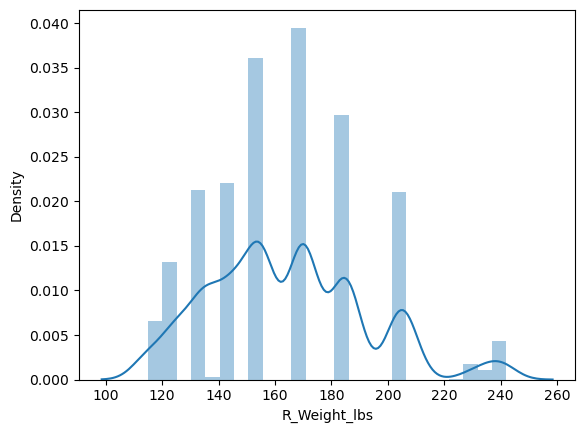

In [72]:
sns.distplot(df['R_Weight_lbs'], bins = 25)

### 'R_total_time_fought(seconds)'

### Q1 = 456.000000

### Q3 = 848.578125

### IQR = 848.578125 - 456 = 392.578125

### Lower Limit: Q1 - (1.5 * IQR) = 456 - (1.5 * 392.578125) = -132.867 
#### (No Lower Limit)

### Upper Limit: Q3 + (1.5 * IQR) = 848.578125 + (1.5 * 392.578125) = 1437.4453125

In [73]:
# Remove Outliers
df[df['R_total_time_fought(seconds)'] > 1437.4453125]

R_fighter           B_fighter          Referee        Date  \
51          Kamaru Usman       Gilbert Burns        Herb Dean  2021-02-13   
97          Max Holloway       Calvin Kattar        Herb Dean  2021-01-16   
1192  Joanna Jedrzejczyk      Rose Namajunas    John McCarthy  2017-11-04   
2169       Dominick Cruz     Takeya Mizugaki    Chris Tognoni  2014-09-27   
2392   Georges St-Pierre     Johny Hendricks   Mario Yamasaki  2013-11-16   
2425    Gilbert Melendez       Diego Sanchez     Kerry Hatley  2013-10-19   
2462    Benson Henderson      Anthony Pettis        Herb Dean  2013-08-31   
2497       Frankie Edgar    Charles Oliveira     Yves Lavigne  2013-07-06   
2553   Georges St-Pierre           Nick Diaz     Yves Lavigne  2013-03-16   
2623   Georges St-Pierre       Carlos Condit     Yves Lavigne  2012-11-17   
2837           Jose Aldo       Kenny Florian  Dan Miragliotta  2011-10-08   
2843       Dominick Cruz  Demetrious Johnson    Kevin Mulhall  2011-10-01   
2919   Georges St-Pierre        Jake Shields        Herb Dean  2011-04-30   

                                        location Winner  title_bout  \
51                        Las Vegas, Nevada, USA    Red        True   
97    Abu Dhabi, Abu Dhabi, United Arab Emirates    Red       False   
1192                New York City, New York, USA   Blue        True   
2169                      Las Vegas, Nevada, USA    Red       False   
2392                      Las Vegas, Nevada, USA    Red        True   
2425                         Houston, Texas, USA    Red       False   
2462                   Milwaukee, Wisconsin, USA   Blue        True   
2497                      Las Vegas, Nevada, USA    Red       False   
2553                    Montreal, Quebec, Canada    Red        True   
2623                    Montreal, Quebec, Canada    Red        True   
2837                         Houston, Texas, USA    Red        True   
2843                         Washington, DC, USA    Red        True   
2919                    Toronto, Ontario, Canada    Red        True   

          weight_class  B_avg_KD  B_avg_opp_KD  B_avg_SIG_STR_pct  \
51        Welterweight  0.271484      0.016113           0.615327   
97       Featherweight  0.351562      0.000000           0.421484   
1192  WomenStrawweight  0.500000      0.000000           0.540938   
2169      Bantamweight  0.515625      0.000000           0.327070   
2392      Welterweight  0.336914      0.000000           0.469170   
2425       Lightweight  0.011963      0.406250           0.356488   
2462       Lightweight  0.750000      0.000000           0.521250   
2497     Featherweight  0.031250      0.500000           0.421016   
2553      Welterweight  0.020020      0.000000           0.442046   
2623      Welterweight  0.375000      0.062500           0.435625   
2837     Featherweight  0.062500      0.500000           0.316156   
2843      Bantamweight  0.000000      0.000000           0.465000   
2919      Welterweight  0.000000      0.000000           0.540000   

      B_avg_opp_SIG_STR_pct  B_avg_TD_pct  B_avg_opp_TD_pct  B_avg_SUB_ATT  \
51                 0.478365      0.220444          0.251914       0.657104   
97                 0.421484      0.505156          0.046875       0.000000   
1192               0.521250      0.736563          0.522188       0.781250   
2169               0.378086      0.193281          0.449531       0.125000   
2392               0.209443      0.452285          0.075547       0.011719   
2425               0.460686      0.232919          0.086750       0.531822   
2462               0.246250      0.082500          0.123750       0.125000   
2497               0.410703      0.517344          0.157188       0.617188   
2553               0.412036      0.237588          0.075508       0.309570   
2623               0.329688      0.039062          0.492812       0.437500   
2837               0.276538      0.332189          0.696736       0.706787   
2843               0.380000      0.830

In [74]:
df = df[df['R_total_time_fought(seconds)'] < 1437.4453125]

/var/folders/l9/n_0jq3zj66l9v7k98dd7cpqc0000gn/T/ipykernel_15108/3880645812.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['R_total_time_fought(seconds)'], bins = 25)


<Axes: xlabel='R_total_time_fought(seconds)', ylabel='Density'>

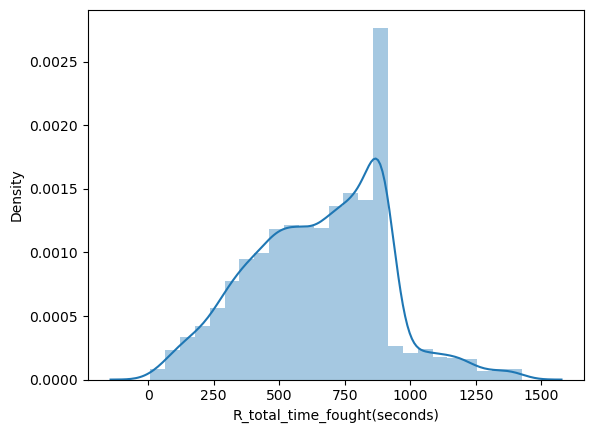

In [84]:
sns.distplot(df['R_total_time_fought(seconds)'], bins = 25)

In [75]:
df.shape

(3451, 184)

In [76]:
df['R_Weight_lbs'].mean()

164.25876557519558

In [77]:
df['R_Weight_lbs'].median()

155.0

In [78]:
df['R_Weight_lbs'].max()

242.0

In [82]:
df['R_Weight_lbs'].min()

115.0

In [79]:
df['R_total_time_fought(seconds)'].mean()

651.5229508780465

In [80]:
df['R_total_time_fought(seconds)'].median()

672.6328125

In [81]:
df['R_total_time_fought(seconds)'].max()

1425.5537109375

In [83]:
df['R_total_time_fought(seconds)'].min()

8.0

## Hypothesis

### The higher the weight of a fighter, the shorter the length of the fight.

# 04. Data Prep for Regression

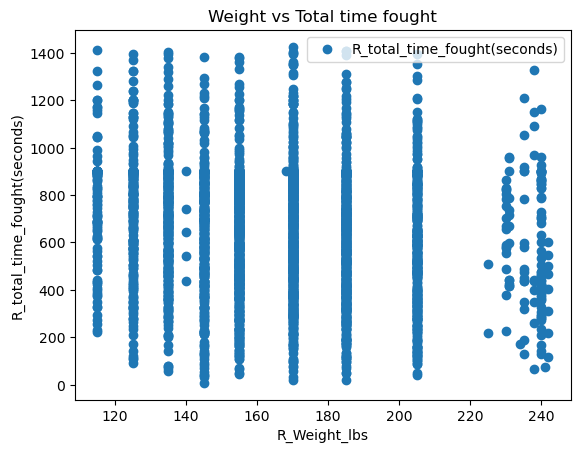

In [85]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'R_Weight_lbs', y='R_total_time_fought(seconds)',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Weight vs Total time fought')  
plt.xlabel('R_Weight_lbs')  
plt.ylabel('R_total_time_fought(seconds)')  
plt.show()

In [86]:
# Reshape the variables into NumPy arrays and put them into separate objects
X = df['R_Weight_lbs'].values.reshape(-1,1)
y = df['R_total_time_fought(seconds)'].values.reshape(-1,1)

In [87]:
# Split data into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 05. Regression Analysis

In [88]:
# Create the regression object
regression = LinearRegression()

In [89]:
# Fit the regression object onto the training set
regression.fit(X_train, y_train)

LinearRegression()

In [90]:
# Predict the values of y using X
y_predicted = regression.predict(X_test)

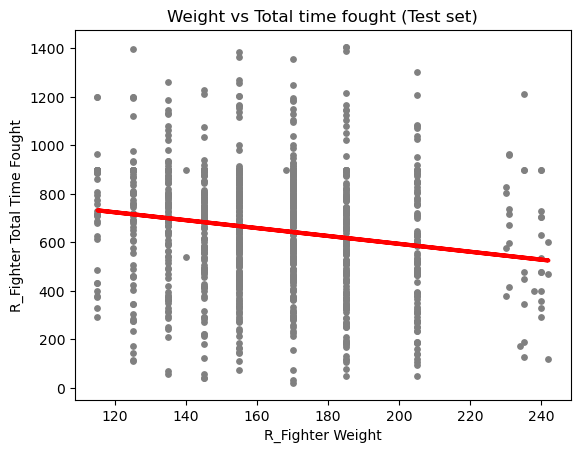

In [91]:
# Create a plot that shows the regression line from the model on the test set

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Weight vs Total time fought (Test set)')
plot_test.xlabel('R_Fighter Weight')
plot_test.ylabel('R_Fighter Total Time Fought')
plot_test.show()

### After viewing the regression line on the test data, it appears that the fit is not strong as there are many points far from the regression line.

In [92]:
# Create objects that contain the model summary statistics
rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted) 

In [93]:
# Print the model summary statistics
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.62529441]]
Mean squared error:  64573.312842073916
R2 score:  0.025585352172019182


In [94]:
y_predicted

array([[642.4434358 ],
       [642.4434358 ],
       [666.82285194],
       ...,
       [683.07579604],
       [699.32874014],
       [642.4434358 ]])

In [95]:
# Create a dataframe comparing the actual and predicted values of y
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})

In [96]:
data.head(30)

Actual   Predicted
0    398.125000  642.443436
1    675.500000  642.443436
2    879.468750  666.822852
3    900.000000  642.443436
4    685.046875  618.064020
5    891.074219  731.834628
6    898.625000  715.581684
7    897.250000  715.581684
8    395.500000  585.558131
9    893.796875  666.822852
10   959.478516  642.443436
11   900.000000  731.834628
12  1049.806641  618.064020
13  1036.636719  585.558131
14   564.500000  666.822852
15   328.578125  618.064020
16   515.875000  642.443436
17   659.980225  618.064020
18   834.052060  642.443436
19   934.716797  699.328740
20   611.125000  715.581684
21   184.500000  585.558131
22   862.375000  699.328740
23   567.315674  642.443436
24   435.875000  618.064020
25   370.992188  618.064020
26  1139.140625  666.822852
27   315.250000  585.558131
28   798.625000  699.328740
29   308.439026  585.558131

# 06. Results

### Unfortunately, after viewing the regression line, the difference between the predicted values and actual y values, and the mean squared error and R2 score, it has been determined that a linear relationship does not exist between the two variables. For instance, the mean squared error is 64573.31 which is very large and indicates that our points are far away from our regression line and the model has poor accuracy. Also, the R2 score is 0.0256, and since this number is close to 0, it indicates a poor fit.
### I do think that this model could have bias such as exclusion bias for other factors that are important in the duration of a fight, such as the fighter's significant strike percentage and takedowns per fight. It is important that new hypotheses are created and different variables are tested to find a strong model.

# 07. Export Clean Dataframe

In [97]:
# Export data to pkl
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_CLEAN2.pkl'))